<a href="https://colab.research.google.com/github/rerebebeccacca/20210602-machine-learing/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras.datasets.mnist import load_data
#(x_train, y_train),(x_test, y_test)
(x_train, y_train),(x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)#手寫data
print(y_train.shape)#正確答案
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


0


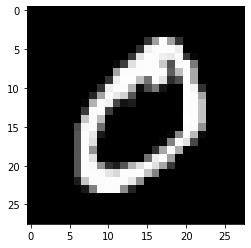

In [7]:
import matplotlib.pyplot as plt
print(y_train[1])
#choose colormap-> cmap = "YlGn_r"(顏色反轉)
plt.imshow(x_train[1], cmap="gray")

In [11]:
import pandas as pd
pd.DataFrame(x_train[1])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layers = [
    # 784*128(線條）128 (bias) = 100480      
    Dense(128, activation="relu", input_dim=784),
    #128*10(線條）＋ 10 (bias)=ㄉㄢ
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()#

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
